**NAME** : Pratik Vijay Bhagyawant\
**CLASS** : BE-AIDS\
**ROLL No** : 2547008\
**Batch** : A\
**SUB** : Computer Laboratory I (Machine Learning)

**Problem Statement**: Implement Random Forest Classifier model to predict the safety of the car.\
**Dataset link**: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
le=LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [8]:
for col in df.columns:
    print(f"Column name: {col}")
    print(f"Unique values: {df[col].unique()}")
    print()

Column name: buying
Unique values: [3 0 2 1]

Column name: maint
Unique values: [3 0 2 1]

Column name: doors
Unique values: [0 1 2 3]

Column name: persons
Unique values: [0 1 2]

Column name: lug_boot
Unique values: [2 1 0]

Column name: safety
Unique values: [2 0 1]

Column name: class
Unique values: [2 0 3 1]



<Axes: >

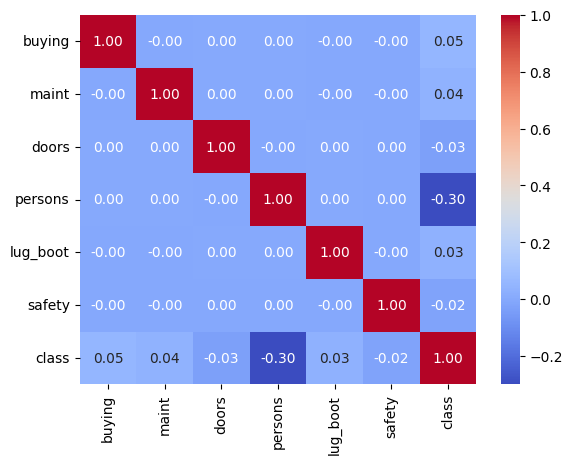

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')

In [10]:
X = df.drop('class', axis=1)
y = df['class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.92      0.71      0.80        17
           2       0.98      1.00      0.99       361
           3       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519

Accuracy Score: 0.9653179190751445


Confusion Matrix:
[[108   1   7   2]
 [  1  12   0   4]
 [  1   0 360   0]
 [  2   0   0  21]]


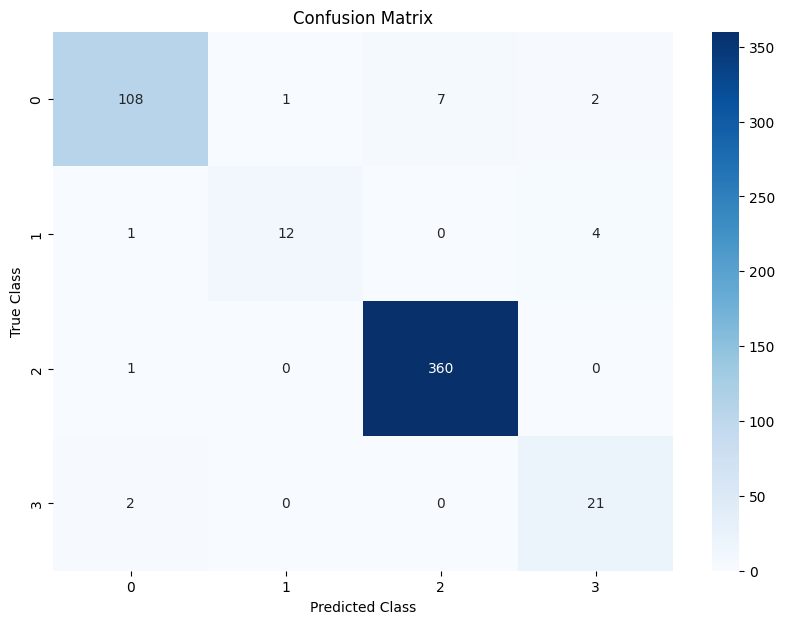

In [14]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()